# Type 1 and Type 2 errors

## Introduction

In hypothesis testing, we are performing statistic tests to determine whether we believe a statement to be true or false. This initial statement we are testing is called the **null hypothesis** One common example of this is whether we believe two populations to be statistically different from one another. For example, we might be interested in testing if a new website layout is more effective in getting customers to make a purchase. In order to determine this, we would compare statistics, such as the average number of purchases in a given day, before and after the change, in order to determine if the new layout was indeed effective.


## Objectives

You will be able to:

* Explain why alpha = 0.05 is chosen as the cut off point for rejecting Null hypothesis in most scientific experiments
* Simulate Type I and Type II errors with alpha control to observe the output of an experiment
* Describe and differentiate between TYPE I and TYPE II errors
* Understand alpha and beta for representing false positive and false negative values

## Alpha and Type 1 Errors

When conducting hypothesis testing, we must choose a confidence level, alpha ($\alpha$) which we will use as the threshold for accepting or rejecting the null hypothesis. This confidence level is also the probability that you reject the null hypothesis when it is actually true. 

Let's talk about a simple example to make this more understandable. 

Let's say that we flip a coin 30 times and get a total of 23 heads. The first thought in your head is, is this a fair coin? With that you create the following null hypothesis.

**Null Hypothesis:** This coin is fair.

The null hypothesis is assumed to be true unless there is overwhelming evidence to the contrary. To quantify this you must determine what level of confidence for which you will reject the null hypothesis. Traditionally, we set **alpha = .05**. This indicates that there is a 5% chance that we may reject the null hypothesis when it is actually true. 

## Beta (1-alpha) and Type 2 Errors
The compliment to this is beta ($\beta$), the probability that we accept the null hypothesis when it is actually false. These two errors have a direct relation to each other; reducing type 1 errors will increase type 2 errors and vice versa. 

## Testing an Unfair Coin

In [1]:
import numpy as np
import scipy

Here we'll simulate an unfair coin with 75% chance of heads and 25% chance of tails. We'll then *flip* this coin 20 times and perform a test to determine whether we believe it to be fair or unfair.

In [2]:
n = 20 #Number of flips
p = .75 #We are simulating an unfair coin
coin1 = np.random.binomial(n, p)
coin1

18

In this case, we know the theoretical mean and standard deviation of a fair coin; it can be modelled by a binomial distribution with p = .5. In future cases, you'll often use a t-test (as you've already previewed) in order to compare samples, but don't know the overall population statistics.

The variance of a binomial distribution is given by:  

$\sigma = \sqrt{n \bullet p \bullet (1-p)}$

So we expect that for a sample of 20 elements, the standard deviation from the expected number of heads (10) for a fair coin should be:

In [87]:
sigma = np.sqrt(n*.5*(1-.5))
sigma

2.23606797749979

And with that we can now calculate a p-value using a traditional z-test:

$ z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$

Here, $\bar{x}$ is the number of heads, $\mu$ (mu) is the expected number of heads (10), $\sigma$ (sigma) is our standard deviation (calculated above) and n is the number of observations (20).

In [91]:
z = (coin1 - 10) / (sigma / np.sqrt(n))
z

8.0

In [92]:
z = (coin1 - 10) / (sigma / np.sqrt(n))
z

8.0

Finally, we take our z-score and apply standard lookup tables based on our knowledge of the normal distribution to determine the probability 

In [5]:
import scipy.stats as st

In [6]:
st.norm.cdf(np.abs(z))

0.8413447460685429

Thus, we will reject our null hypothesis *this coin is fair* and conclude that the coin is unfair!

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Text(0.5, 0, 'Number of Coin Flips')

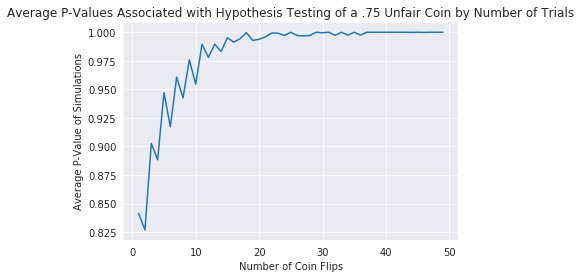

In [8]:
#How many times would we have to flip a 75% heads coin to determine it was false?
p_vals = []
#Iterate through various numbers of trials
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        p = .75 #We are simulating an unfair coin
        n_heads = np.random.binomial(n, p)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
    p_vals.append(np.mean(p_val))
plt.plot(list(range(1,50)), p_vals)
plt.title('Average P-Values Associated with Hypothesis Testing of a .75 Unfair Coin by Number of Trials')
plt.ylabel('Average P-Value of Simulations')
plt.xlabel('Number of Coin Flips')

## Summary

Great! You now know what type 1 and type 2 errors are. Let's go and practice your knowledge!